# Reservation Cancelation Prediction (RCP)

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.
Can you predict if the customer is going to honor the reservation or cancel it?

#**1. Exploratory Data Analysis.**
Lets take a look at the data.

In [996]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [997]:
data = pd.read_csv("data/hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [998]:
X = data.drop("is_canceled", axis=1)
y = data.is_canceled

Listing all variables:

In [999]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Checking type, amount of null rows and in whitch variable:

In [1000]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dropping the arrival_date_week_number, variable is multiplying information of the other variables indicating time.

In [1001]:
data = data.drop(['arrival_date_week_number'],axis=1)

In [1002]:
data.arrival_date_day_of_month.value_counts()

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

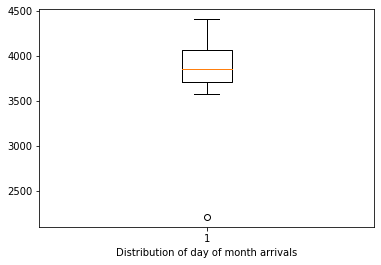

In [1003]:
x = data.arrival_date_day_of_month.value_counts()

plt.xlabel("Distribution of day of month arrivals")
plt.boxplot(x)
plt.show()

<AxesSubplot: ylabel='Density'>

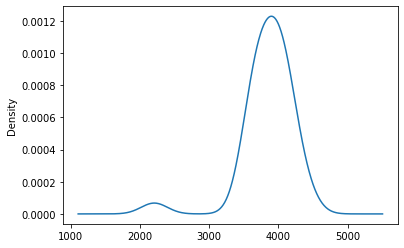

In [1004]:
x.plot.density()

On the 31 day of each month guests arrive less often:

In [1005]:
data.arrival_date_day_of_month.value_counts().sort_values(ascending=True)

31    2208
10    3575
29    3580
22    3596
11    3599
23    3616
1     3626
7     3665
13    3745
4     3763
21    3767
27    3802
14    3819
6     3833
30    3853
3     3855
8     3921
28    3946
24    3993
18    4002
20    4032
19    4052
2     4055
16    4078
12    4087
9     4096
26    4147
25    4160
15    4196
5     4317
17    4406
Name: arrival_date_day_of_month, dtype: int64

Recorded years:

In [1006]:
data.arrival_date_year.unique()

array([2015, 2016, 2017])

Combining arrival_date_year, arrival_date_month, arrival_date_day_of_month into one column with full date:

In [1007]:
data[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]] #YYYY-MM-DD

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1
...,...,...,...
119385,2017,August,30
119386,2017,August,31
119387,2017,August,31
119388,2017,August,31


Switching names of month into numbers:

In [1008]:
from datetime import datetime

Concatenating year, month and day and creating new column: arrival_date

In [1009]:
#This is one shot only, due to inplace=True
arr_date = data.arrival_date_year.astype(str)+"-"+data.arrival_date_month.astype(str)+"-"+data.arrival_date_day_of_month.astype(str)
data["arrival_date"] = arr_date

Dropping leftovers: arrival_date_year, arrival_date_month, arrival_date_day_of_month

In [1010]:
data.drop(["arrival_date_year","arrival_date_month","arrival_date_day_of_month"], axis=1, inplace=True)

After concatenation, got one instead of three variables:

In [1011]:
data["arrival_date"]

0            2015-July-1
1            2015-July-1
2            2015-July-1
3            2015-July-1
4            2015-July-1
               ...      
119385    2017-August-30
119386    2017-August-31
119387    2017-August-31
119388    2017-August-31
119389    2017-August-29
Name: arrival_date, Length: 119390, dtype: object

Converting names of months into numbers:

In [1012]:
data["arrival_date"] = ([datetime.strptime(str(x), "%Y-%B-%d") 
                        for x in data["arrival_date"]])#.astype("object") #one-shot
data["arrival_date"] = data.arrival_date.astype(object)

Checking if the length of variable didn't change:

In [1013]:
print("Finally date looks like this:")
data["arrival_date"]

Finally date looks like this:


0         2015-07-01 00:00:00
1         2015-07-01 00:00:00
2         2015-07-01 00:00:00
3         2015-07-01 00:00:00
4         2015-07-01 00:00:00
                 ...         
119385    2017-08-30 00:00:00
119386    2017-08-31 00:00:00
119387    2017-08-31 00:00:00
119388    2017-08-31 00:00:00
119389    2017-08-29 00:00:00
Name: arrival_date, Length: 119390, dtype: object

In [1014]:
data.arrival_date.value_counts()

2015-12-05    448
2016-11-07    366
2015-10-16    356
2016-10-13    344
2015-09-18    340
             ... 
2015-12-15     29
2015-11-15     28
2015-12-07     27
2015-11-29     20
2015-12-13     19
Name: arrival_date, Length: 793, dtype: int64

Now I have data in following shape:

In [1015]:
data.shape

(119390, 29)

In [1016]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

Problem: reservation date is bigger than arrival date, why?? Because it indicates only check-outs or cancelation or No-Show. Reservation status can be recorded after arrival because for example some one doesn't honour his reservation after a period of time record of No-show is recorded with boigger date.

In [1017]:
data.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

Checking unique values in variables to know what they keep and if there are everywhere correct and no invalid informations:

In [1018]:
data.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [1019]:
data.total_of_special_requests.unique()

array([0, 1, 3, 2, 4, 5])

Interresting what the number in special requests stands for and which requests guests apply for more often or less.

In [1020]:
data.total_of_special_requests.value_counts(dropna=1)

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [1021]:
data.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3])

In [1022]:
data.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

Maybe the number is a identifier of agent company. 352 unique identifiers.

In [1023]:
len(np.sort(data.company.dropna().unique()))

352

Below we can see quantity of reservations from all agents:

In [1024]:
data.company.dropna().sort_values(ascending=0).value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
347.0      1
352.0      1
368.0      1
373.0      1
6.0        1
Name: company, Length: 352, dtype: int64

In [1025]:
data.company.dropna().unique().min()

6.0

In [1026]:
data.company.dropna().unique().max()

543.0

Are there zeroes in "company", "agent", "country"?

In [1027]:
(data["company"]==0).value_counts()

False    119390
Name: company, dtype: int64

In [1028]:
(data["agent"]==0).value_counts()

False    119390
Name: agent, dtype: int64

In [1029]:
(data["country"]==0).value_counts()

False    119390
Name: country, dtype: int64

In [1030]:
data.company.dropna().median(), data.agent.dropna().median()

(179.0, 14.0)

In [1031]:
data.company.dropna().mean(), data.agent.dropna().mean()

(189.26673532440782, 86.69338185346919)

In [1032]:
data.agent.dropna().unique

<bound method Series.unique of 3         304.0
4         240.0
5         240.0
7         303.0
8         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 103050, dtype: float64>

In [1033]:
(data["company"]==0).sum()

0

There are null observations in agent, company, country:

In [1034]:
(data[["agent", "company", "country"]]).isnull().sum()

agent       16340
company    112593
country       488
dtype: int64

Filling empty cells in agent column with "empty".

In [1035]:
agent_input = data["country"][data.agent.value_counts().max()]

In [1036]:
data.agent.fillna(agent_input, inplace=True)

Inputting NaNs in country column with the most frequent value:

In [1037]:
country_input = data["country"][data.country.value_counts().max()]

In [1038]:
data.country.fillna(country_input, inplace=True)

Filling empty cells in company column with "empty".

In [1039]:
data.company.fillna("empty", inplace=True)

In [1040]:
(data[["agent", "company", "country"]]).isnull().sum()

agent      0
company    0
country    0
dtype: int64

Now all data have equal length!

In [1041]:
data.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [1042]:
(data.previous_cancellations==0).sum()

112906

In [1043]:
data.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [1044]:
data.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

TA- travel agency, TO-online travel agencies, GDS- global distribution system

In [1045]:
data.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [1046]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [1047]:
(data.market_segment=="Undefined").sum()

2

In [1048]:
(data.market_segment=="Online TA").sum()

56477

In [1049]:
(data.country.value_counts(dropna=1)).head(60)

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
JPN      197
CZE      171
IND      152
KOR      133
GRC      128
DZA      103
SRB      101
HRV      100
MEX       85
EST       83
IRN       83
LTU       81
ZAF       80
BGR       75
NZL       74
COL       71
UKR       68
MOZ       67
CHL       65
SVK       65
THA       59
SVN       57
ISL       57
LVA       55
ARE       51
CYP       51
TWN       51
SAU       48
PHL       40
TUN       39
Name: country, dtype: int64

In [1050]:
((data.country.value_counts(dropna=1))==21)

PRT    False
GBR    False
FRA    False
ESP    False
DEU    False
       ...  
DJI    False
BWA    False
HND    False
VGB    False
NAM    False
Name: country, Length: 177, dtype: bool

In [1051]:
data.country.isnull().sum()

0

In [1052]:
data.country.dropna().unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [1053]:
data.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [1054]:
(data.meal=="Undefined").sum()

1169

In [1055]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

In [1056]:
data.babies.unique()

array([ 0,  1,  2, 10,  9])

In [1057]:
data.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [1058]:
(data.babies==0).sum()

118473

In [1059]:
data.children.dropna().unique()

array([ 0.,  1.,  2., 10.,  3.])

In [1060]:
data["children"] = (data.children.dropna()).astype(int)

In [1061]:
data["children"].dtype

dtype('float64')

In [1062]:
data.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [1063]:
(data.children.dropna()==0).sum()

110796

In [1064]:
data.children.isnull().sum()

4

In [1065]:
data.children.fillna(0, inplace=True)

In [1066]:
data.children = data.children.astype(int)

In [1067]:
data.children.isnull().sum()

0

In [1068]:
data.adults.dropna().unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [1069]:
data.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [1070]:
data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [1071]:
data.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [1072]:
data.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [1073]:
data.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [1074]:
(data["adr"]==0).sum()

1959

In [1075]:
len(data["adr"].dropna().unique())

8879

In [1076]:
(data.adr.value_counts()==1).value_counts()

False    4738
True     4141
Name: adr, dtype: int64

In [1077]:
data.adr.value_counts(ascending=False).head(60)

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
80.00     1889
95.00     1661
120.00    1607
100.00    1573
85.00     1538
110.00    1525
60.00     1313
130.00    1275
48.00     1123
115.00    1080
70.00     1044
99.00      905
140.00     866
126.00     852
108.00     818
170.00     759
160.00     748
89.00      747
68.00      725
105.00     722
135.00     675
79.20      620
89.10      606
117.00     566
62.80      565
109.00     564
88.00      560
72.00      529
94.50      509
79.00      489
66.00      484
98.00      482
96.00      475
55.00      472
101.50     459
67.00      459
58.00      455
125.00     445
81.00      431
74.80      423
35.00      420
107.10     420
40.00      418
76.50      417
50.00      408
80.75      389
104.00     383
78.00      380
150.00     379
64.00      370
84.00      367
130.50     366
30.00      365
85.50      363
45.00      362
Name: adr, dtype: int64

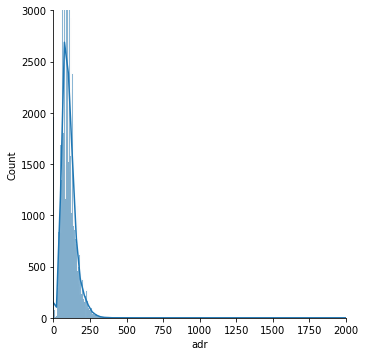

In [1078]:
sns.displot(data.adr, kde=True, rug=False).set(ylim=(0, 3000)).set(xlim=(0, 2000))
plt.show()

In [1079]:
data.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [1080]:
data.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [1081]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [1082]:
data["market_segment"] = data.market_segment.replace(
    {
        "Aviation": "Aviation",
        "Undefined": "Aviation"
    }
)

In [1083]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           239
Name: market_segment, dtype: int64

Quantities of complementary rates to figure out what complementary is:
Maybe it's  free or very cheap hotel room for promotion purposes or free accomodation in a favor for some hotel misbehaviors?

In [1084]:
(data[data["market_segment"]=="Complementary"]["adr"]).value_counts()

0.00      680
6.00        5
2.00        5
4.00        4
65.00       4
9.00        3
20.00       3
55.00       2
79.00       2
56.00       2
3.00        2
7.00        2
42.00       1
1.60        1
1.00        1
55.50       1
6.50        1
139.00      1
35.00       1
74.00       1
70.00       1
75.00       1
170.00      1
9.14        1
29.00       1
5.20        1
17.50       1
2.40        1
68.00       1
30.00       1
54.00       1
23.50       1
52.50       1
37.33       1
62.50       1
62.00       1
42.75       1
48.00       1
109.65      1
14.00       1
4.50        1
Name: adr, dtype: int64

adr- average daily rate

In [1085]:
data.shape

(119390, 29)

In [1086]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119390 non-null  int64  
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

In [1087]:
data.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False
customer_type                     False
adr                               False
required_car_parking_spaces       False


In [1088]:
data.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

Three meal plans, not selected means guest resign of the meal. Maybe change  to 0,1,2,3?

In [1089]:
data.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [1090]:
data.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [1091]:
data.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

Got seven types of rooms, change to int (1,2,3)

In [1092]:
data.booking_changes.value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

If visit canceled?(0,1)

In [1093]:
data.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [1094]:
data.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Is a parking required? (0,1)No, Yes

In [1095]:
data.days_in_waiting_list.value_counts(ascending=False).head(60)

0      115692
39        227
58        164
44        141
31        127
35         96
46         94
69         89
63         83
87         80
50         80
38         76
111        71
101        65
45         65
77         63
41         63
223        61
62         60
3          59
98         59
22         56
122        55
15         54
48         52
28         50
176        50
91         50
17         47
96         46
391        45
56         45
187        45
68         42
60         41
75         40
93         40
21         37
65         35
236        35
147        30
33         30
178        30
19         30
42         30
162        30
20         29
40         28
10         28
27         26
34         26
4          25
160        25
25         25
57         25
120        25
80         24
47         24
215        21
108        20
Name: days_in_waiting_list, dtype: int64

In [1096]:
data.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [1097]:
data.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [1098]:
data.reservation_status_date.value_counts(ascending=False).head(60)

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
2015-07-02     469
2016-12-07     450
2015-12-18     423
2016-02-09     412
2016-04-04     382
2017-01-24     343
2016-11-21     340
2016-03-15     329
2017-01-19     321
2017-02-02     315
2016-09-20     303
2016-04-17     299
2017-05-05     297
2015-09-09     290
2016-04-27     283
2016-06-20     279
2016-09-06     271
2016-06-26     271
2016-10-21     265
2017-04-21     263
2015-10-19     262
2016-03-14     261
2016-02-01     258
2016-02-14     257
2016-06-02     257
2015-11-17     256
2015-12-08     254
2016-03-18     254
2017-01-31     253
2016-09-15     251
2017-01-20     249
2016-12-13     249
2016-05-29     245
2016-12-12     243
2015-10-12     242
2016-10-10     242
2016-01-19     233
2017-02-24     231
2016-01-06     231
2016-10-07     230
2016-07-13     230
2017-02-15     229
2016-02-10     228
2017-02-28     226
2017-01-12     225
2016-05-05     225
2016-10-06     224
2016-10-16  

Removing highly correlated variable with predicted column is_canceled: reservation_status

In [1099]:
data.drop("reservation_status", axis=1, inplace=True)

In [1100]:
data.lead_time.max()

737

In [1101]:
data.lead_time.min()

0

In [1102]:
data.lead_time.mean()

104.01141636652986

Number of days between booking and arrival

In [1103]:
data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,No Deposit,PRT,empty,0,Transient,0.00,0,0,2015-07-01,2015-07-01 00:00:00
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,No Deposit,PRT,empty,0,Transient,0.00,0,0,2015-07-01,2015-07-01 00:00:00
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,No Deposit,PRT,empty,0,Transient,75.00,0,0,2015-07-02,2015-07-01 00:00:00
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,No Deposit,304.0,empty,0,Transient,75.00,0,0,2015-07-02,2015-07-01 00:00:00
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,No Deposit,240.0,empty,0,Transient,98.00,0,1,2015-07-03,2015-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0,0,BB,BEL,...,No Deposit,394.0,empty,0,Transient,96.14,0,0,2017-09-06,2017-08-30 00:00:00
119386,City Hotel,0,102,2,5,3,0,0,BB,FRA,...,No Deposit,9.0,empty,0,Transient,225.43,0,2,2017-09-07,2017-08-31 00:00:00
119387,City Hotel,0,34,2,5,2,0,0,BB,DEU,...,No Deposit,9.0,empty,0,Transient,157.71,0,4,2017-09-07,2017-08-31 00:00:00
119388,City Hotel,0,109,2,5,2,0,0,BB,GBR,...,No Deposit,89.0,empty,0,Transient,104.40,0,0,2017-09-07,2017-08-31 00:00:00


In [1104]:
data.adr.head()

0     0.0
1     0.0
2    75.0
3    75.0
4    98.0
Name: adr, dtype: float64

In [1105]:
data.adr.dtype

dtype('float64')

In [1106]:
data.adr.value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: adr, Length: 8879, dtype: int64

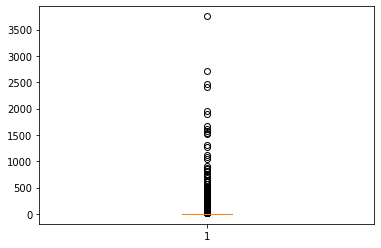

In [1107]:
plt.boxplot(data.adr.value_counts())
plt.show()

In [1108]:
(data.adr)

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

Checking if data.adr column doesn't have outliers:

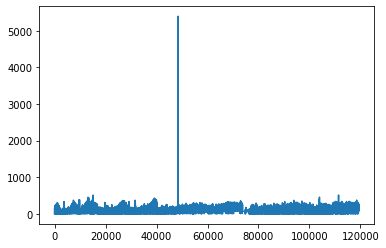

In [1109]:
y_plot = list(data.adr)
x_plot = np.arange(0, len(data.adr))
plt.plot(x_plot, y_plot)
plt.show()

One record has very high value!

In [1110]:
data.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Saving memory by converting to smaller binary

In [1111]:
data.adr.astype("float16")

0           0.000
1           0.000
2          75.000
3          75.000
4          98.000
           ...   
119385     96.125
119386    225.375
119387    157.750
119388    104.375
119389    151.250
Name: adr, Length: 119390, dtype: float16

Rounding to 2 dec, to meet currency norms

In [1112]:
data.adr.round(2)

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

Replacing 5400 value will be performed in another file(after splitting dataset)

In [1114]:
data.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Advanced plotting of data.adr

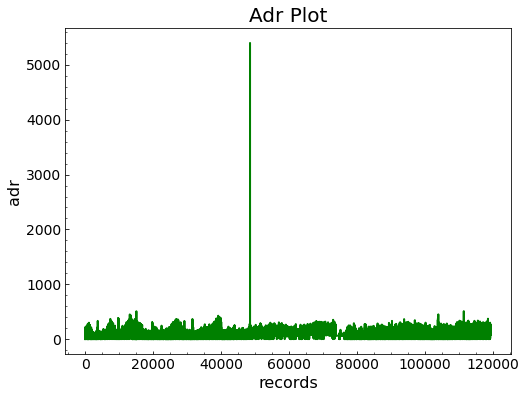

In [1115]:
y_plot = list(data.adr)
x_plot = np.arange(0, len(data.adr))
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title("Adr Plot", {'fontsize':20})
ax.plot(x_plot, y_plot, '-', linewidth = 2, c='green')
ax.set_xlabel('records', fontsize=16)
ax.set_ylabel('adr', fontsize=16)

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  # axis: x, y, both  which: major, minor, both
ax.minorticks_on()


In [1116]:
data.country = data.country.astype(str)

In [1117]:
data.agent = data.agent.astype(str)

In [1118]:
data.company = data.company.astype(str)

Saving dataset to pickle file as data_clear.pkl:

In [1119]:
data.to_pickle("data/data_clear.pkl")

#**Divide values into small amount of bins (labeling):**

In [1120]:
data.stays_in_weekend_nights.value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [1121]:
data["stays_in_weekend_nights"] = pd.cut(data.stays_in_weekend_nights,
      bins=[-1, 1, 2, np.inf],
      labels=["zero", "one_night", "more"]).astype(object)

In [1122]:
data.stays_in_weekend_nights.value_counts()

zero         82624
one_night    33308
more          3458
Name: stays_in_weekend_nights, dtype: int64

In [1123]:
data.stays_in_week_nights.max()

50

In [1124]:
data.stays_in_week_nights.value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

Into the bins (labeling):

In [1125]:
data["stays_in_week_nights"] = pd.cut(data.stays_in_week_nights,
      bins=[-1, 1, 2, np.inf],
      labels=["zero", "one_night", "more"]).astype(object)

In [1126]:
data.stays_in_week_nights.value_counts()

more         47751
zero         37955
one_night    33684
Name: stays_in_week_nights, dtype: int64

In [1127]:
data.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

GDS and Undefined have low counts therefore I assign them to Corporate(the less numerous of the rest big numbered)

In [1128]:
data["distribution_channel"] = data["distribution_channel"].replace(
    {"GDS": "Corporate",
    "Undefined": "Corporate"})

data.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6875
Name: distribution_channel, dtype: int64

In [1129]:
data.distribution_channel.value_counts().sum()

119390

In [1130]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           239
Name: market_segment, dtype: int64

Into the bins (labeling):

In [1131]:
data["market_segment"] = data["market_segment"].replace(
    {"Complementary": "Corporate",
    "Aviation": "Corporate",
    "Undefined" : "Corporate"})

data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         6277
Name: market_segment, dtype: int64

In [1132]:
data.country.value_counts().sum()

119390

In [1133]:
data.country.value_counts().head(60)

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
JPN      197
CZE      171
IND      152
KOR      133
GRC      128
DZA      103
SRB      101
HRV      100
MEX       85
EST       83
IRN       83
LTU       81
ZAF       80
BGR       75
NZL       74
COL       71
UKR       68
MOZ       67
CHL       65
SVK       65
THA       59
SVN       57
ISL       57
LVA       55
ARE       51
CYP       51
TWN       51
SAU       48
PHL       40
TUN       39
Name: country, dtype: int64

In [1134]:
country2cat = dict(pd.cut(data.country.value_counts(),
                          bins=[0, 1024, 7287, 12129, np.inf],
                          labels=["Other","Lo_freq","Freq","Hi-Freq"]).astype(str))
data["country"] = data.country.replace(country2cat)
data.country.value_counts()

Hi-Freq    49078
Freq       31112
Lo_freq    27467
Other      11733
Name: country, dtype: int64

In [1135]:
data.country.shape #check if column length (119390) is valid

(119390,)

In [1136]:
data.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

Bins: Yes_babies, No_babies

In [1137]:
data["babies"] = data["babies"].replace(
    {0: "No_babies",
    1: "Yes_babies",
    2: "Yes_babies",
    10: "Yes_babies",
    9: "Yes_babies",})
data.babies.value_counts().sum()

119390

In [1138]:
data["children"].astype(int)
data.children.value_counts()

0     110800
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

Bins: Yes_child, No_child

In [1139]:
data["children"] = data["children"].replace(
    {0: "No_child",
    1: "Yes_child",
    2: "Yes_child",
    10: "Yes_child",
    3: "Yes_child",})
data.children.value_counts()

No_child     110800
Yes_child      8590
Name: children, dtype: int64

In [1140]:
data.children.value_counts().sum()

119390

Seems that .adr(Average Daily Rate) is continuous, I'm not binning it.

In [1141]:
data.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

Bins of .adults:

In [1142]:
pd.cut(data["adults"],            
       bins=[-1, 0, 1, np.inf],
       labels=["Zero",
               "Lone_wolf",
               "Two_more"
                ]).value_counts()

Two_more     95960
Lone_wolf    23027
Zero           403
Name: adults, dtype: int64

Bins of meal: not bining it. Describes type of meal or if not defined, may impact described n need to have all of types of meal distinguished.

In [1143]:
data.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Unballanced is_repeated_guest, I'll deal with that later.

In [1144]:
data.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Bining previous_cancellations(unballanced):

In [1145]:
data.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [1146]:
pd.cut(["previous_cancellations"],            
       bins=[-1, 0, 1, np.inf],
       labels=["Zero",
               "One_time",
               "Twice_more"
                ]).value_counts()

Zero          0
One_time      0
Twice_more    0
dtype: int64

Bining previous_bookings_not_canceled (unballanced):

In [1147]:
data.previous_bookings_not_canceled.value_counts().head(60)

0     115770
1       1542
2        580
3        333
4        229
5        181
6        115
7         88
8         70
9         60
10        53
11        43
12        37
13        30
14        28
15        21
16        20
25        17
17        16
18        14
19        13
20        12
21        12
22        10
24         9
27         9
26         7
28         7
23         7
29         6
30         4
31         2
32         2
58         2
48         2
44         2
62         1
56         1
57         1
59         1
60         1
61         1
65         1
63         1
64         1
66         1
67         1
68         1
69         1
70         1
71         1
54         1
55         1
36         1
53         1
41         1
33         1
34         1
35         1
37         1
Name: previous_bookings_not_canceled, dtype: int64

In [1148]:
pd.cut(["previous_bookings_not_canceled"],            
       bins=[-1, 0, 1, np.inf],
       labels=["Zero",
               "One_time",
               "Twice_more"
                ]).value_counts()

Zero          0
One_time      0
Twice_more    0
dtype: int64

Bining reserved_room_type:

In [1149]:
data.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

Bins of reserved_room_type:

In [1150]:
data["reserved_room_type"].replace(
    {"L": "Rare",
    "P": "Rare",
    "H": "Rare",
    "C": "Rare",
    "B": "Rare",
    "G": "Less_frequent",
     "F": "Less_frequent",
     "E": "More_frequent",
     "D": "Max_frequent",
     "A": "Max_frequent",    
    }).value_counts()

Max_frequent     105195
More_frequent      6535
Less_frequent      4991
Rare               2669
Name: reserved_room_type, dtype: int64

assigned_room_type to bins:

In [1151]:
data.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [1152]:
data["assigned_room_type"].replace(
    {"L": "Rare",
    "P": "Rare",
    "H": "Rare",
    "K": "Rare",
    "I": "Rare",
    "G": "Less_frequent",
     "F": "Less_frequent",
     "B": "Less_frequent",
     "C": "Less_frequent",
     "E": "Frequent",
     "D": "More_frequent",
     "A": "Max_frequent",    
    }).value_counts()

Max_frequent     74053
More_frequent    25322
Less_frequent    10842
Frequent          7806
Rare              1367
Name: assigned_room_type, dtype: int64

Bins of booking_changes

In [1153]:
data.booking_changes.value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [1154]:
pd.cut(data["booking_changes"],            
       bins=[-1, 0, 1, np.inf],
       labels=["Zero",
               "One_time",
               "Twice_more"
                ]).value_counts()

Zero          101314
One_time       12701
Twice_more      5375
Name: booking_changes, dtype: int64

Bins of deposit_type, cannot bin this one:

In [1155]:
data.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

No bining here:

In [1156]:
data.agent.value_counts().head(60)

9.0      31961
PRT      16340
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
3.0       1336
37.0      1230
19.0      1061
40.0      1039
314.0      927
21.0       875
229.0      786
242.0      780
83.0       696
29.0       683
171.0      607
12.0       578
85.0       554
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       450
15.0       402
26.0       401
11.0       395
22.0       382
56.0       375
273.0      349
177.0      347
86.0       338
58.0       335
5.0        330
119.0      304
196.0      301
34.0       294
44.0       292
138.0      287
315.0      284
38.0       274
10.0       260
236.0      247
16.0       246
17.0       241
115.0      225
251.0      220
68.0       211
42.0       211
191.0      198
175.0      195
154.0      193
195.0      193
Name: agent, dtype: int64

days_in_waiting_list may determine if someone resigns his reservation.

In [1157]:
data.days_in_waiting_list.value_counts().head(60)

0      115692
39        227
58        164
44        141
31        127
35         96
46         94
69         89
63         83
87         80
50         80
38         76
111        71
101        65
45         65
77         63
41         63
223        61
62         60
3          59
98         59
22         56
122        55
15         54
48         52
28         50
176        50
91         50
17         47
96         46
391        45
56         45
187        45
68         42
60         41
75         40
93         40
21         37
65         35
236        35
147        30
33         30
178        30
19         30
42         30
162        30
20         29
40         28
10         28
27         26
34         26
4          25
160        25
25         25
57         25
120        25
80         24
47         24
215        21
108        20
Name: days_in_waiting_list, dtype: int64

In [1158]:
pd.cut(["days_in_waiting_list"],            
       bins=[-1, 0, 15, np.inf],
       labels=["Zero",
               "Short",   #up to 14 days as short waiting
               "Long"     #more than 14 is long period
                ]).value_counts()

Zero     0
Short    0
Long     1
dtype: int64

No bining at this one:

In [1159]:
data.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [1160]:
data.adr.value_counts().head(60)

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
80.00     1889
95.00     1661
120.00    1607
100.00    1573
85.00     1538
110.00    1525
60.00     1313
130.00    1275
48.00     1123
115.00    1080
70.00     1044
99.00      905
140.00     866
126.00     852
108.00     818
170.00     759
160.00     748
89.00      747
68.00      725
105.00     722
135.00     675
79.20      620
89.10      606
117.00     566
62.80      565
109.00     564
88.00      560
72.00      529
94.50      509
79.00      489
66.00      484
98.00      482
96.00      475
55.00      472
101.50     459
67.00      459
58.00      455
125.00     445
81.00      431
74.80      423
35.00      420
107.10     420
40.00      418
76.50      417
50.00      408
80.75      389
104.00     383
78.00      380
150.00     379
64.00      370
84.00      367
130.50     366
30.00      365
85.50      363
45.00      362
Name: adr, dtype: int64

adr into a quantile bins

In [1161]:
pd.qcut(data.adr, q=4, labels=["1st", "2nd", "3rd", "4th"], retbins=True)

(0         1st
 1         1st
 2         2nd
 3         2nd
 4         3rd
          ... 
 119385    3rd
 119386    4th
 119387    4th
 119388    3rd
 119389    4th
 Name: adr, Length: 119390, dtype: category
 Categories (4, object): ['1st' < '2nd' < '3rd' < '4th'],
 array([  -6.38 ,   69.29 ,   94.575,  126.   , 5400.   ]))

In [1162]:
data.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [1163]:
pd.cut(["required_car_parking_spaces"],            
       bins=[-1, 0, 1, np.inf],
       labels=["Zero",
               "One",
               "Two_more"
                ]).value_counts()

Zero        0
One         0
Two_more    0
dtype: int64

In [1164]:
data.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [1165]:
pd.cut(["total_of_special_requests"],            
       bins=[-1, 0, 1, np.inf],
       labels=["Zero",
               "One",
               "Two_more"
                ]).value_counts()

Zero        0
One         0
Two_more    0
dtype: int64

In [1166]:
data.reservation_status_date.value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

In [1167]:
data.lead_time.value_counts().head(60)

0     6345
1     3460
2     2069
3     1816
4     1715
5     1565
6     1445
7     1331
8     1138
12    1079
11    1055
9      992
10     976
14     965
16     942
17     881
15     839
19     839
34     828
18     826
13     821
28     820
20     750
40     722
29     712
22     707
32     690
31     685
21     678
56     676
39     673
37     673
26     671
24     665
36     663
30     659
35     655
25     653
27     649
33     643
23     643
44     633
41     607
55     575
38     575
47     568
68     564
69     558
45     537
72     531
53     530
50     527
59     520
74     519
61     513
48     506
46     495
49     479
43     479
54     472
Name: lead_time, dtype: int64

In [1168]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
arrival_date                

In [1169]:
pd.cut(data["lead_time"],            
       bins=[-1, 0, 15, np.inf],
       labels=["Zero",
               "Short",   #up to 14 days as short waiting
               "Long"     #more than 14 is long period
                ]).value_counts()

Long     91779
Short    21266
Zero      6345
Name: lead_time, dtype: int64

In [1170]:
data.sample(5)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
14993,Resort Hotel,1,166,zero,one_night,2,No_child,No_babies,FB,Hi-Freq,...,Non Refund,PRT,empty,0,Transient,121.50,0,0,2015-04-28,2015-07-15 00:00:00
100792,City Hotel,0,226,one_night,one_night,2,No_child,No_babies,BB,Freq,...,No Deposit,3.0,empty,0,Transient-Party,70.00,0,1,2016-11-02,2016-10-29 00:00:00
30234,Resort Hotel,0,63,zero,one_night,3,No_child,No_babies,HB,Freq,...,No Deposit,177.0,empty,0,Transient,77.18,0,0,2016-11-17,2016-11-14 00:00:00
70344,City Hotel,1,281,zero,more,2,No_child,No_babies,BB,Freq,...,No Deposit,9.0,empty,0,Transient,130.00,0,1,2017-06-02,2017-06-15 00:00:00
77320,City Hotel,0,237,zero,one_night,2,No_child,No_babies,BB,Lo_freq,...,No Deposit,9.0,empty,0,Transient-Party,89.25,0,0,2015-09-17,2015-09-14 00:00:00


Saving dataset to pickle file as data_bins.pkl:

In [1171]:
data.to_pickle("data/data_bins.pkl")